In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import pandas as pd
import os

In [2]:
os.chdir(r'../..') #change to project root dir

In [3]:
pred_path = "./output/aia_171_2012-2016_256_cevae_pred/20210807-150551_cevae/predictions/predictions.txt"
pixel_pred_path = "./output/aia_171_2012-2016_256_cevae_pred/20210807-153314_cevae/predictions"
data_path = "./data/aia_171_2012-2016_256/train"

In [4]:
df = pd.read_csv(pred_path, header=None, names = ["img", "score"])
df.head()

,img,score
0,2012-01-01T000000__171.jpeg,0.069883
1,2012-01-01T060000__171.jpeg,0.069426
2,2012-01-01T120000__171.jpeg,0.070843
3,2012-01-01T180000__171.jpeg,0.071544
4,2012-01-02T000000__171.jpeg,0.069182


In [5]:
df = df.sort_values(by=['score'], ascending=False)
df.head(10)

,img,score
71,2012-01-18T180000__171.jpeg,0.162665
428,2012-04-18T180000__171.jpeg,0.154147
3563,2014-07-09T180000__171.jpeg,0.143576
43,2012-01-11T180000__171.jpeg,0.139146
6849,2016-10-26T180000__171.jpeg,0.110176
1714,2013-03-11T120000__171.jpeg,0.087374
2533,2013-10-09T180000__171.jpeg,0.085628
4994,2015-07-08T180000__171.jpeg,0.082796
2980,2014-02-12T180000__171.jpeg,0.082507
1969,2013-05-16T180000__171.jpeg,0.081752


array([[<AxesSubplot:title={'center':'score'}>]], dtype=object)

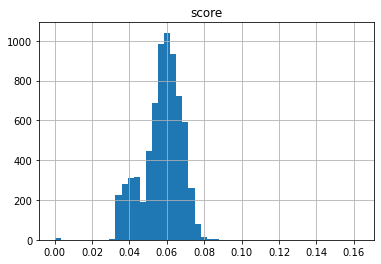

In [6]:
hist = df.hist(bins=50)
hist

In [21]:
df = df[df["score"] > 0.02]
df = df[df["score"] < 0.0801]

In [22]:
df.describe()

,score
count,7086.000000
mean,0.057406
std,0.010120
min,0.025785
25%,0.052007
50%,0.058877
75%,0.064678
max,0.079818


In [23]:
df.head(10)

,img,score
3258,2014-04-23T180000__171.jpeg,0.079818
4203,2014-12-20T060000__171.jpeg,0.079215
2592,2013-10-24T180000__171.jpeg,0.078851
3143,2014-03-25T120000__171.jpeg,0.078728
3144,2014-03-25T180000__171.jpeg,0.078629
3151,2014-03-27T120000__171.jpeg,0.078245
3034,2014-02-26T060000__171.jpeg,0.078216
4106,2014-11-25T180000__171.jpeg,0.078087
3036,2014-02-26T180000__171.jpeg,0.078051
3078,2014-03-09T060000__171.jpeg,0.078021


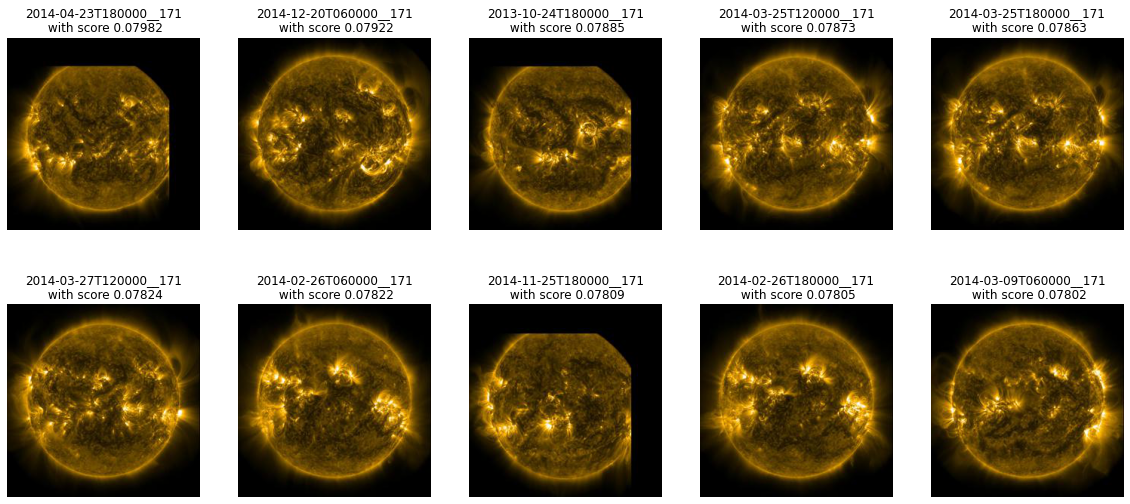

In [29]:
f, axarr = plt.subplots(2,5, figsize=(20, 9))

row_index = 0
column_index = 0

for index, row in df.head(10).iterrows():
    img_path = Path(data_path) / row["img"]
    img = Image.open(img_path)
    img_arr = np.asarray(img)
    axarr[row_index, column_index].axis('off')
    axarr[row_index, column_index].set_title(row["img"].replace(".jpeg", "") + "\n with score " + "%.5f" % row["score"])
    axarr[row_index, column_index].imshow(img_arr, cmap='gray', vmin=0, vmax=255)
   
    if(column_index == 4):
        row_index = (row_index + 1)
        
    column_index = (column_index + 1) % 5 
        

In [25]:
df_asc = df.sort_values(by=['score'], ascending=True)
df_asc.head(10)

,img,score
4608,2015-04-01T060000__171.jpeg,0.025785
7028,2016-12-11T000000__171.jpeg,0.031876
7029,2016-12-11T060000__171.jpeg,0.032142
7017,2016-12-08T060000__171.jpeg,0.032386
7014,2016-12-07T120000__171.jpeg,0.032493
7011,2016-12-06T180000__171.jpeg,0.032531
7040,2016-12-14T000000__171.jpeg,0.032592
7030,2016-12-11T120000__171.jpeg,0.032694
7045,2016-12-15T060000__171.jpeg,0.032697
7052,2016-12-17T060000__171.jpeg,0.032743


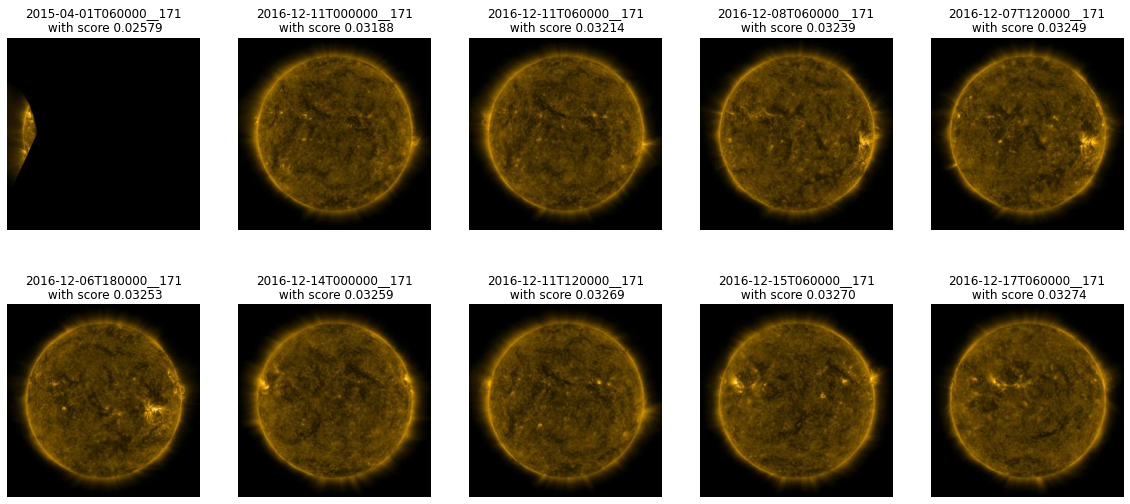

In [30]:
f, axarr = plt.subplots(2,5, figsize=(20, 9))

row_index = 0
column_index = 0

for index, row in df_asc.head(10).iterrows():
    img_path = Path(data_path) / row["img"]
    img = Image.open(img_path)
    img_arr = np.asarray(img)
    axarr[row_index, column_index].axis('off')
    axarr[row_index, column_index].set_title(row["img"].replace(".jpeg", "") + "\n with score " + "%.5f" % row["score"])
    axarr[row_index, column_index].imshow(img_arr, cmap='gray', vmin=0, vmax=255)
   
    if(column_index == 4):
        row_index = (row_index + 1)
        
    column_index = (column_index + 1) % 5 
        

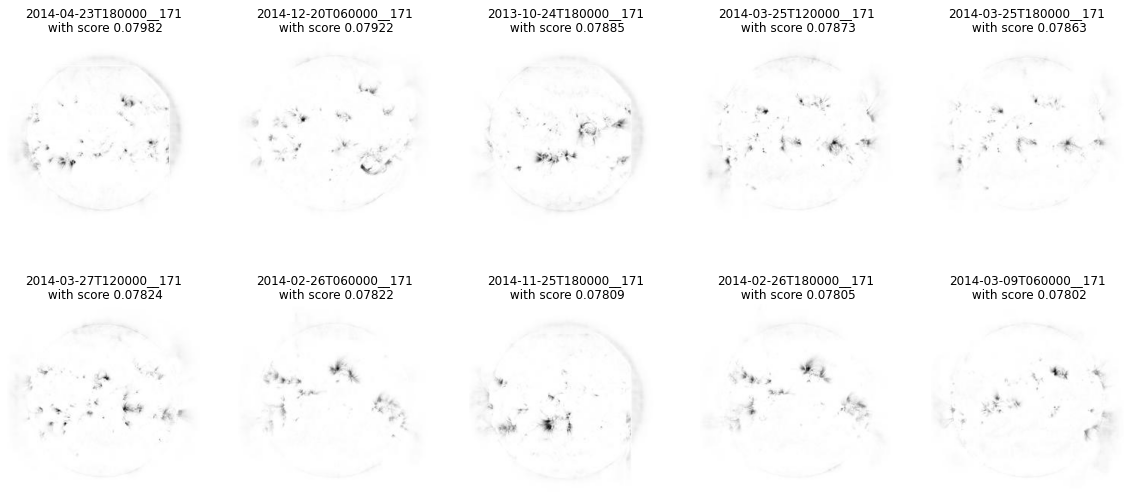

In [31]:
f, axarr = plt.subplots(2,5, figsize=(20, 9))

row_index = 0
column_index = 0

for index, row in df.head(10).iterrows():
    img_path = Path(pixel_pred_path) / row["img"]
    img = Image.open(img_path)
    img_arr = np.invert(np.asarray(img))
    axarr[row_index, column_index].set_title(row["img"].replace(".jpeg", "") + "\n with score " + "%.5f" % row["score"])
    axarr[row_index, column_index].imshow(img_arr, cmap='gray', vmin=0, vmax=255)
    axarr[row_index, column_index].spines['top'].set_visible(False)
    axarr[row_index, column_index].spines['right'].set_visible(False)
    axarr[row_index, column_index].spines['bottom'].set_visible(False)
    axarr[row_index, column_index].spines['left'].set_visible(False)
    axarr[row_index, column_index].xaxis.set_ticks([])
    axarr[row_index, column_index].yaxis.set_ticks([])

    if(column_index == 4):
        row_index = (row_index + 1)
        
    column_index = (column_index + 1) % 5 

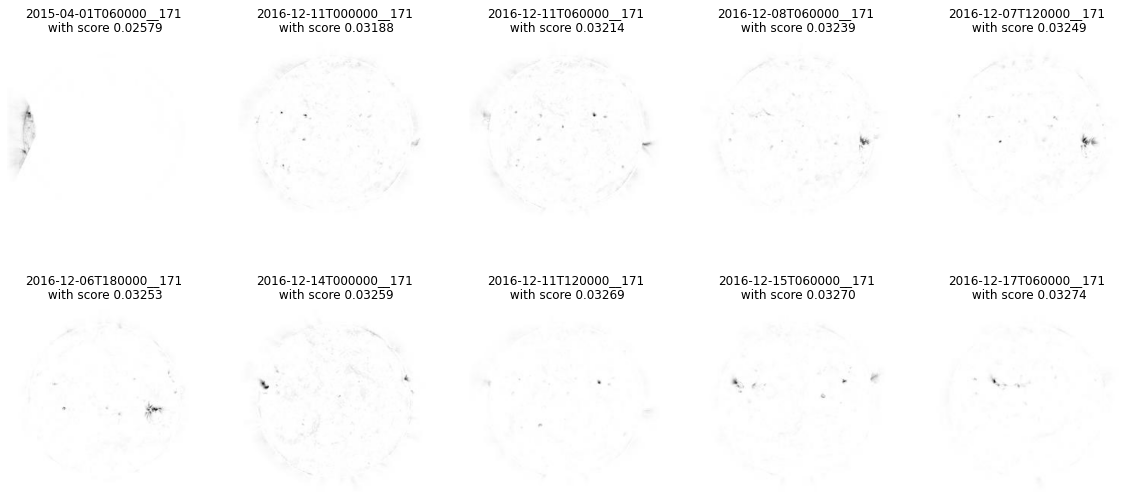

In [32]:
f, axarr = plt.subplots(2,5, figsize=(20, 9))

row_index = 0
column_index = 0

for index, row in df.sort_values(by=['score'], ascending=True).head(10).iterrows():
    img_path = Path(pixel_pred_path) / row["img"]
    img = Image.open(img_path)
    img_arr = np.invert(np.asarray(img))
    axarr[row_index, column_index].set_title(row["img"].replace(".jpeg", "") + "\n with score " + "%.5f" % row["score"])
    axarr[row_index, column_index].imshow(img_arr, cmap='gray', vmin=0, vmax=255)
    axarr[row_index, column_index].spines['top'].set_visible(False)
    axarr[row_index, column_index].spines['right'].set_visible(False)
    axarr[row_index, column_index].spines['bottom'].set_visible(False)
    axarr[row_index, column_index].spines['left'].set_visible(False)
    axarr[row_index, column_index].xaxis.set_ticks([])
    axarr[row_index, column_index].yaxis.set_ticks([])

    if(column_index == 4):
        row_index = (row_index + 1)
        
    column_index = (column_index + 1) % 5 

In [14]:
img_path = "./data/aia_171_2017_full_disk_256/test/2017-04-22T120000__171.jpeg"
img_pred_path = "./output/aia_171_2017_256_cevae_quiet_pred/20210525-095718_cevae/predictions/2017-04-22T120000__171.jpeg"


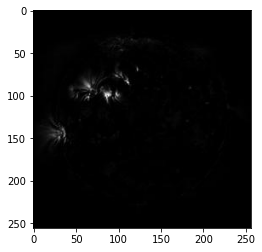

In [15]:
pred_img = Image.open(img_pred_path).convert("L")
arr_pred = np.asarray(pred_img)
plt.imshow(arr_pred, cmap='gray', vmin=0, vmax=255)

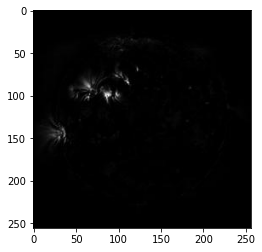

In [16]:
mask_threshold = 0
mask = arr_pred > mask_threshold
sel = np.zeros_like(arr_pred)
sel[mask] = arr_pred[mask]
plt.imshow(sel, cmap='gray', vmin=0, vmax=255)

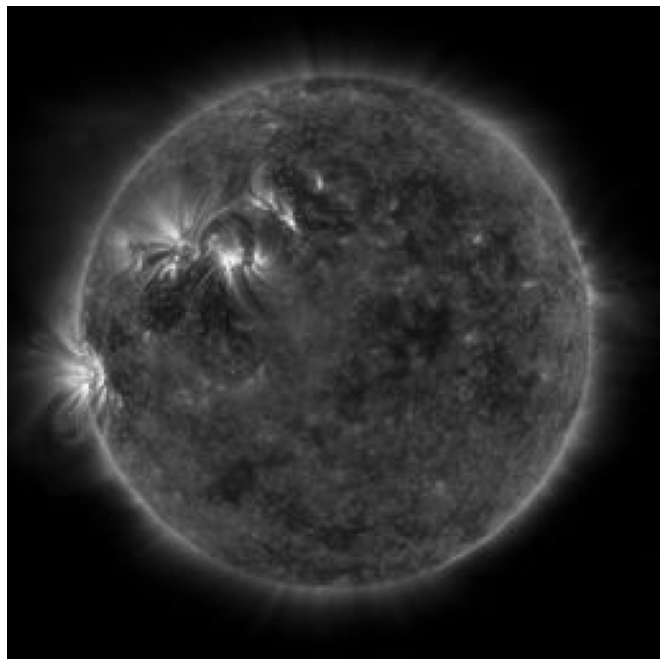

In [21]:
src_img = Image.open(img_path).convert("L")
arr = np.asarray(src_img)
fig = plt.figure(figsize=(12, 12))
plt.axis('off')

plt.imshow(arr, cmap='gray', vmin=0, vmax=255)

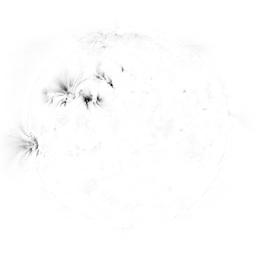

In [18]:
mask_img = Image.fromarray(np.invert(sel))
mask_img

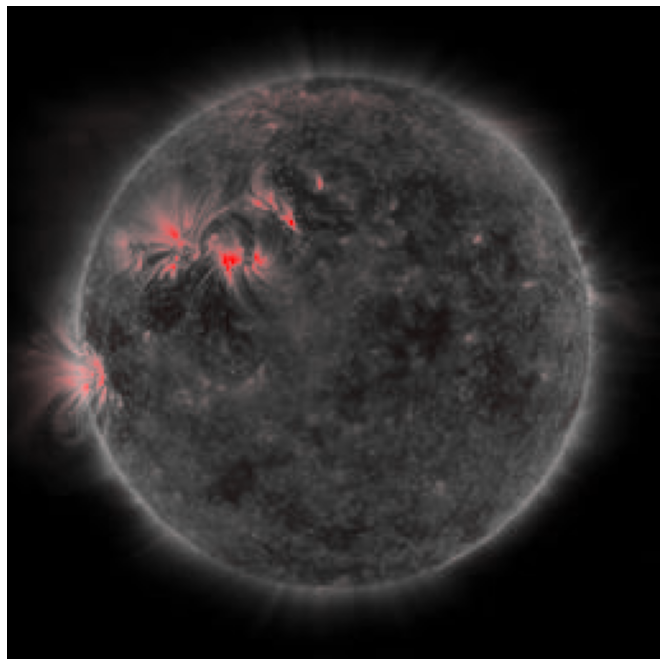

In [20]:
red = Image.new('RGB', (256, 256), color = 'red')

fig = plt.figure(figsize=(12, 12))
plt.axis('off')

src_img = Image.open(img_path).convert("L")
im = Image.composite(src_img, red, mask_img)
plt.imshow(im, vmin=0, vmax=255)

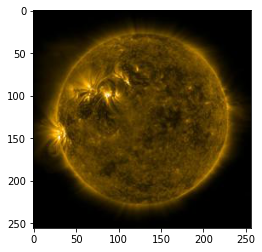

In [42]:
src_img = Image.open(img_path)
arr = np.asarray(src_img)
plt.imshow(arr, cmap='gray', vmin=0, vmax=255)

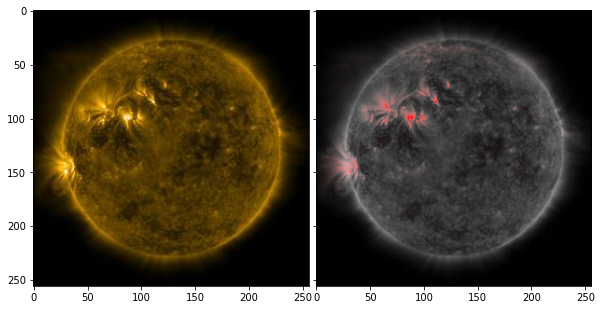

In [43]:
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(10., 10.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(1, 2),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, i in zip(grid, [arr, im]):
    # Iterating over the grid returns the Axes.
    ax.imshow(i)